## European Regional Red List

In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('European_Red_List_2017_December.csv')
df.drop(columns=['taxonomicNotes', 'range', 'population', 'habitat',
                'threats', 'conservationAction', 'redListCategoryRationale',
                'redListAssessors', 'taxonomicRankSubspecies', 'scientificName',
                'conservationStatusAnalysis', 'taxonomicAuthority',
                'europeanRegionalRedListCriteria', 'euRegionalRedListCriteria',
                'euScope', 'useAndTrade', 'redListReviewers', 'redListContributors',
                'endemicToEu', 'euRegionalRedListCategory'],
        inplace=True)
df.rename(columns={'taxonomicRankKingdom':'kingdom',
                   'taxonomicRankPhylum':'phylum',
                   'taxonomicRankClass': 'class',
                   'taxonomicRankOrder':'order',
                   'taxonomicRankFamily':'family',
                   'taxonomicRankGenus': 'genus',
                   'taxonomicRankSpecies': 'species',
                   'taxonomicRankSubspecies':'subspecies',
                   'speciesGroup':'species_group',
                   'endemicToEurope': 'endemic',
                   'europeanRegionalRedListCategory': 'category',
}, inplace=True)
# do sokmething with population trend

In [4]:
df['endemic'] = df['endemic'].map({'No':0, 'Yes':1})
df = df[df['category'].notnull()]

In [5]:
features = df.columns.drop('category')
old_df = df

df = pd.get_dummies(df[features], drop_first = True)
df['category'] = old_df['category']

In [6]:
X = df.drop(columns=['category'])
y = df['category']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state=13)

### RANDOM FOREST

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_params = ({
    'min_samples_split': [4, 5],
    'min_samples_leaf' : [1],
    'max_features':['auto', 3000, 4000],
})

In [ ]:
gs = GridSearchCV(rf, param_grid=grid_params, cv=5)
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs = gs.best_estimator_

In [ ]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

### DECISION TREE

In [45]:
dc = DecisionTreeClassifier()
grid_params = ({
    'max_features': [None],
    'min_samples_leaf': [5],
    'min_samples_split':[2,3,4],
    'max_depth': [None,2,3]
})
gs = GridSearchCV(dc, param_grid= grid_params, cv=5)
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 2, 3], 'max_features': [None],
                         'min_samples_leaf': [5],
          

In [46]:
gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [47]:
gs = gs.best_estimator_

In [48]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.6759829464708669, 0.6337477797513321)

### LOGISTIC REGRESSION

In [8]:
lr = LogisticRegression(C=1, max_iter=100)
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.8238986262434865, 0.6401420959147425)

In [66]:
cats = old_df['category']

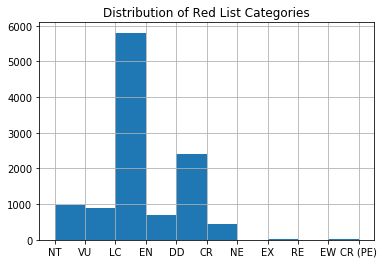

In [71]:
cats.hist()

plt.title('Distribution of Red List Categories');

In [72]:
#Baseline 

cats.value_counts(normalize=True)

LC         0.515588
DD         0.213962
NT         0.085620
VU         0.078604
EN         0.061018
CR         0.040501
EX         0.002576
CR (PE)    0.000711
RE         0.000711
NE         0.000355
EW         0.000355
Name: category, dtype: float64

In [14]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11259 entries, 0 to 11669
Data columns (total 12 columns):
species_group      11259 non-null object
extracted          11259 non-null object
kingdom            11259 non-null object
phylum             11259 non-null object
class              11259 non-null object
order              11259 non-null object
family             11259 non-null object
genus              11028 non-null object
species            11028 non-null object
endemic            11259 non-null int64
category           11259 non-null object
populationTrend    11004 non-null object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [29]:
old_df['endemic'].groupby(old_df['category']).mean()

category
CR         0.888158
CR (PE)    1.000000
DD         0.449979
EN         0.742358
EW         1.000000
EX         0.931034
LC         0.335401
NE         0.000000
NT         0.594398
RE         0.000000
VU         0.784181
Name: endemic, dtype: float64

In [35]:
category_df = df.groupby(df['category']).mean()

In [56]:
extinct = df[df['category']== 'EX']
extinct.mean().sort_values(ascending=False).head(15)

endemic                              0.931034
extracted_2011_September             0.862069
phylum_CHORDATA                      0.586207
species_group_Freshwater_Fishes      0.448276
phylum_MOLLUSCA                      0.275862
family_SALMONIDAE                    0.275862
class_GASTROPODA                     0.275862
order_SALMONIFORMES                  0.275862
genus_Coregonus                      0.206897
species_group_Freshwater_Molluscs    0.172414
order_LITTORINIMORPHA                0.172414
phylum_TRACHEOPHYTA                  0.137931
class_MAGNOLIOPSIDA                  0.137931
kingdom_PLANTAE                      0.137931
family_HYDROBIIDAE                   0.137931
dtype: float64

In [44]:
#  Bees are data deficient or not as endangered. Birds are very endangered (regionally
# extinct). Fish especially are very exinct
# Endemic species are more endangered


In [55]:
least = df[df['category']== 'LC']
least.mean().sort_values(ascending=False).head(15)

populationTrend_Stable         0.418088
populationTrend_Unknown        0.406029
class_INSECTA                  0.342636
endemic                        0.335401
extracted_2011_September       0.331955
phylum_CHORDATA                0.290439
kingdom_PLANTAE                0.217571
phylum_TRACHEOPHYTA            0.215332
extracted_2015_June            0.194143
extracted_2015_April           0.174160
phylum_MOLLUSCA                0.149354
class_GASTROPODA               0.144703
species_group_Plants           0.136434
species_group_Marine_Fishes    0.120413
class_MAGNOLIOPSIDA            0.118346
dtype: float64

In [57]:
critically_endangered = df[df['category']== 'CR']
critically_endangered.mean().sort_values(ascending=False).head(15)

endemic                              0.888158
extracted_2011_September             0.765351
populationTrend_Decreasing           0.464912
populationTrend_Unknown              0.427632
phylum_MOLLUSCA                      0.355263
class_GASTROPODA                     0.348684
kingdom_PLANTAE                      0.291667
phylum_TRACHEOPHYTA                  0.285088
species_group_Plants                 0.271930
class_MAGNOLIOPSIDA                  0.250000
species_group_Freshwater_Molluscs    0.239035
phylum_CHORDATA                      0.221491
order_LITTORINIMORPHA                0.217105
family_HYDROBIIDAE                   0.199561
species_group_Freshwater_Fishes      0.138158
dtype: float64

In [59]:
extinct_wild = df[df['category']== 'EW']
extinct_wild.mean().sort_values(ascending=False).head(15)

endemic                     1.00
extracted_2011_September    1.00
kingdom_PLANTAE             0.75
species_group_Plants        0.75
phylum_TRACHEOPHYTA         0.75
family_GRAMINEAE            0.50
genus_Bromus                0.50
order_CYPERALES             0.50
class_LILIOPSIDA            0.50
family_PRIMULACEAE          0.25
phylum_CHORDATA             0.25
genus_Stenodus              0.25
species_minoricensis        0.25
class_MAGNOLIOPSIDA         0.25
species_interruptus         0.25
dtype: float64

In [61]:
df['endemic'].value_counts()
# Endemic and non-endemic species are pretty evenly split - but we see WAY more endemic
# species that are endangered. These are likely smaller, and thus more vulnerable, 
# populations in the first place. 

0    6007
1    5252
Name: endemic, dtype: int64